## Визуализация карты для темы: 
## "Динамика загрязнения окружающей среды"

### Импортируем необходимые библиотеки

In [0]:
!pip install pandas
!pip install geopandas
!pip install matplotlib
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

### Читаем файл с координатами по регионам РФ

In [0]:
fp ='Regions.shp' # or 'Regions.shx'
map_df = gpd.read_file(fp)

In [7]:
map_df.head() #Просматриваем сам файл

,geometry
0,"POLYGON ((61.96619 55.03031, 61.99005 55.02993..."
1,"MULTIPOLYGON (((37.28999 63.88848, 37.29309 63..."
2,"MULTIPOLYGON (((53.92590 67.98348, 53.92736 67..."
3,"POLYGON ((29.61796 58.25263, 29.62738 58.25511..."
4,"POLYGON ((34.08077 51.66570, 34.08434 51.66928..."


### Читаем файл с загрязнениями по регионам РФ

In [0]:
data = pd.read_csv('pollution.csv')

In [9]:
data.head() #Просматриваем сам файл

,Unnamed: 0,"Экономическая зона, район","Выбросы загрязняющих атмосферу веществ, отходящих от стационарных источников, млн т",Место района по степени загрязнённости атмосферного воздуха,"Сброс загрязненных сточных вод, млрд м3",Место района по степени загрязнённости водных ресурсов
0,0,Российская Федерация,20.0,0.0,23.0,0.0
1,1,"Западная зона (Европейская Россия), в том числ...",12.0,0.0,18.0,0.0
2,2,Северный,2.7,4.0,1.3,8.0
3,3,Северо-Западный,0.4,11.0,1.9,6.0
4,4,Центральный,1.4,5.0,4.6,1.0


In [0]:
#Избавляемся от лишней информации
data = data.drop([11,1],axis=0)
data = data.drop(['Unnamed: 0'],axis = 1).reset_index()
data = data.drop(['index'],axis=1)


In [0]:
# Экономические регионы РФ по рядам в map_df
north = [1,2,24,42,54,65,82 ]
northwest = [3,43,44,45]
central = [21,22,26,41,50,53,57,63,64]
volgo_vyatka = [47,48,51,52,56,59,61]
chernozem = [5,15,25,72]
volga = [27,28,30,32,40,62,73]
north_Caucasus = [4,12,13,14,31,33,34,35,36,37,38,39]
ural = [23,29,49,55,58,60,0]
kaliningrad = [46]
western_siberia = [16,17,18,19,20,69,70,71]
eastern_siberia = [8,9,11,68,74,75,76,77,81]
far_eastern = [6,10,7,66,78,79,80]

In [0]:
# 2D Массив со всеми регионами
arr = x = [[1,2,24,42,54,65,82 ],[3,43,44,45],[21,22,26,41,50,53,57,63,64], [47,48,51,52,56,59,61], [5,15,25,72], [27,28,30,32,40,62,73], [4,12,13,14,31,33,34,35,36,37,38,39],  [23,29,49,55,58,60,0], [46], [16,17,18,19,20,69,70,71], [8,9,11,68,74,75,76,77,81], [6,10,7,66,78,79,80]]

In [0]:
# Заполняем пустой массив данными, в зависимости от экономического региона
y = [int(0) for i in range(83)]
for j in range(len(x)):
    for i in range(len(x[j])):
        if j == 0:
            y[x[j][i]]= 2.70
        elif j==1:
            y[x[j][i]]= 0.40
        elif j == 2:
            y[x[j][i]]= 1.40
        elif j == 3:
            y[x[j][i]]= 0.50
        elif j == 4:
            y[x[j][i]]= 0.60
        elif j == 5:
            y[x[j][i]]= 1.30
        elif j == 6:
            y[x[j][i]]= 0.50
        elif j == 7:
            y[x[j][i]]= 4.60
        elif j == 8:
            y[x[j][i]]= 0.04
        elif j == 9:
            y[x[j][i]]= 3.40
        elif j == 10:
            y[x[j][i]]= 3.60
        elif j == 11:
            y[x[j][i]]= 1.00

In [0]:
# Создаем новый столбик со значениями
map_df['value'] = y

# Создаем карту

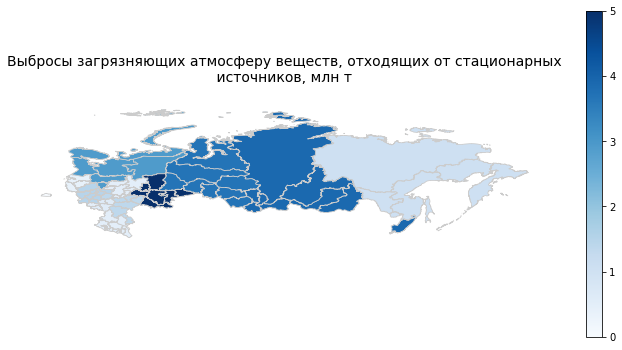

In [15]:
fig, ax = plt.subplots(1, figsize=(12, 6))
map_df.drop([67],axis=0).plot(column='value', cmap='Blues', linewidth=0.8,ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Выбросы загрязняющих атмосферу веществ, отходящих от стационарных\n источников, млн т \n', \
              fontdict={'fontsize': '14',
                        'fontweight' : '2'})
# Визуализируем столбик
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=5))
sm._A = []
cbar = fig.colorbar(sm)